pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.


In [109]:
# import numpy and pandas as they go together most of the time
import numpy as np
import pandas as pd

# read csv file having data for IPL matches and load into pandas DataFrame
matches = pd.read_csv("data/matches.csv")

In [110]:
# return top 2  (default is 5) records/rows of the dataframe
matches.head(2)
# return last 5 records
#df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [111]:
# return shape of the dataframe
matches.shape

(636, 18)

In [112]:
# One liner returning basic information about the datframe
# this is the priliminary step in understanding your data...observe carefully
# gives datatypes, null, records count, size column counts etc
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [113]:
# Obviously last column 'umpire3' has no meaning to keep in dataframe
# drop it.
matches = matches.drop('umpire3', axis=1)

In [114]:
# this very first statistical function describes your data by calculating count,
# mean, standard deviation and quartiles of the data
# obviously works for only numeric columns
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


In [115]:
# fetch single column from this dataframe
# when fetched signle row or single column, it will be a 'Series' type ('pandas.core.series.Series')
print(matches['winner'])
print(type(matches['winner']))
print((matches['winner']).shape)

0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
631    Royal Challengers Bangalore
632    Royal Challengers Bangalore
633            Sunrisers Hyderabad
634            Sunrisers Hyderabad
635            Sunrisers Hyderabad
Name: winner, Length: 636, dtype: object
<class 'pandas.core.series.Series'>
(636,)


In [116]:
teams = matches[['team1', 'team2', 'winner' ]]
print(teams)
print(type(teams))


                           team1                        team2  \
0            Sunrisers Hyderabad  Royal Challengers Bangalore   
1                 Mumbai Indians       Rising Pune Supergiant   
2                  Gujarat Lions        Kolkata Knight Riders   
3         Rising Pune Supergiant              Kings XI Punjab   
4    Royal Challengers Bangalore             Delhi Daredevils   
..                           ...                          ...   
631             Delhi Daredevils  Royal Challengers Bangalore   
632                Gujarat Lions  Royal Challengers Bangalore   
633          Sunrisers Hyderabad        Kolkata Knight Riders   
634                Gujarat Lions          Sunrisers Hyderabad   
635          Sunrisers Hyderabad  Royal Challengers Bangalore   

                          winner  
0            Sunrisers Hyderabad  
1         Rising Pune Supergiant  
2          Kolkata Knight Riders  
3                Kings XI Punjab  
4    Royal Challengers Bangalore  
..       

In [117]:
# access a row based on index (numerical values)
# Its type is also 'pandas.core.series.Series'
print(type(teams.iloc[0]))
# access specified row and columns from the dataframe
teams.iloc[4,2]


<class 'pandas.core.series.Series'>


'Royal Challengers Bangalore'

In [118]:
# slicing
print(teams.iloc[1:9:2])
# fency indexing
print(teams.iloc[[1,3,6]])

                         team1                   team2                  winner
1               Mumbai Indians  Rising Pune Supergiant  Rising Pune Supergiant
3       Rising Pune Supergiant         Kings XI Punjab         Kings XI Punjab
5                Gujarat Lions     Sunrisers Hyderabad     Sunrisers Hyderabad
7  Royal Challengers Bangalore         Kings XI Punjab         Kings XI Punjab
                    team1                   team2                  winner
1          Mumbai Indians  Rising Pune Supergiant  Rising Pune Supergiant
3  Rising Pune Supergiant         Kings XI Punjab         Kings XI Punjab
6   Kolkata Knight Riders          Mumbai Indians          Mumbai Indians


In [119]:
# takes only numeric index for both row and columns
matches.iloc[2:4,[2, 4, 5, 11]]

,city,team1,team2,win_by_runs
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,0
3,Indore,Rising Pune Supergiant,Kings XI Punjab,0


In [120]:
# loc : used to access row id based access and column names (Not index)
# elaborate on this
matches.loc[1:8:2, ['city', 'team1', 'team2', 'winner']]

,city,team1,team2,winner
1,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
3,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
5,Hyderabad,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad
7,Indore,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab


In [121]:
# masking for filter operations on dataframe
mask = matches['winner'] == 'Rising Pune Supergiant'
print(matches[mask])
#df[mask].shape[0]


    id  season       city        date                   team1  \
1    2    2017       Pune  2017-04-06          Mumbai Indians   
16  17    2017  Bangalore  2017-04-16  Rising Pune Supergiant   
24  25    2017       Pune  2017-04-22     Sunrisers Hyderabad   
27  28    2017     Mumbai  2017-04-24  Rising Pune Supergiant   
32  33    2017       Pune  2017-04-29  Rising Pune Supergiant   
37  38    2017       Pune  2017-05-01           Gujarat Lions   
39  40    2017    Kolkata  2017-05-03   Kolkata Knight Riders   
42  43    2017  Hyderabad  2017-05-06  Rising Pune Supergiant   
53  54    2017       Pune  2017-05-14         Kings XI Punjab   
55  56    2017     Mumbai  2017-05-16  Rising Pune Supergiant   

                          team2                  toss_winner toss_decision  \
1        Rising Pune Supergiant       Rising Pune Supergiant         field   
16  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
24       Rising Pune Supergiant       Rising Pune 

In [122]:
# using multiple conditions in the mask
mask1 = matches['team1'] == 'Kings XI Punjab'
mask2 = matches['team2'] == 'Royal Challengers Bangalore'
filteres_mateches1 = matches[mask1 & mask2].loc[:,['winner']]

mask3 = matches['team1'] == 'Royal Challengers Bangalore'
mask4 = matches['team2'] == 'Kings XI Punjab'
filteres_mateches2 = matches[mask3 & mask4].loc[:,['winner']]

filteres_mateches2 = matches[mask3 & mask4].loc[:,['winner']]

# value_counts() : return a series with indes as values and n=count as their values
print(type(filteres_mateches1.value_counts()))

# add two series. It adds based on the index
print(filteres_mateches1.value_counts() + filteres_mateches2.value_counts())



<class 'pandas.core.series.Series'>
winner                     
Kings XI Punjab                12
Royal Challengers Bangalore     8
dtype: int64


In [123]:
# use value_counts to find all frequency counts in a series
# works only on categorical data and returns pandas series
print(type(matches['winner'].value_counts()))
matches['winner'].value_counts()

<class 'pandas.core.series.Series'>


Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

<AxesSubplot: ylabel='winner'>

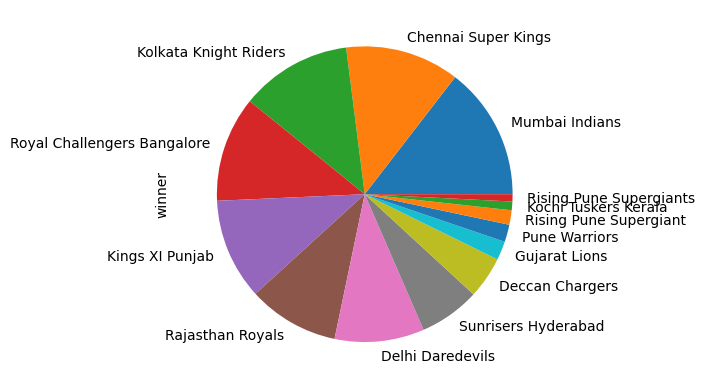

In [124]:
# Pandas plot
import matplotlib.pyplot as plt
winning_teams = matches['winner'].value_counts()
#ps1.plot(kind='bar', legend=True)
winning_teams.plot(kind='pie')

pandas.core.frame.DataFrame

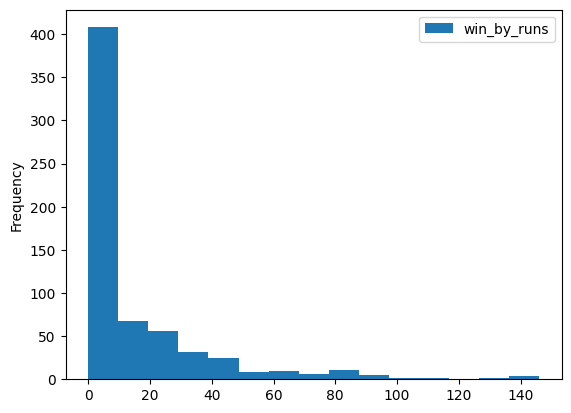

In [125]:
# winning margin histogram plot
matches.loc[:,['win_by_runs']].plot(kind='hist', bins=15)
# Note: Having a single column doesn't necessarily mean a pandas series. 
# It can be DataFrame. Mind the column header here.
type(matches.loc[:,['win_by_runs']])

Pandas Series and properties

In [126]:
# check all the indexses in a series
print(winning_teams.index)
print(winning_teams.values)
# head and tail are equally applicable on pandas Series. behave the same way as dataframe


Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Gujarat Lions', 'Pune Warriors', 'Rising Pune Supergiant',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype='object')
[92 79 77 73 70 63 62 42 29 13 12 10  6  5]


In [127]:
# get value at the supplied index
print(type(winning_teams))
# series seems more like a dictionary. You pass key and it returns coressponding value
print(winning_teams.get('Royal Challengers Bangalore'))
#OR
print(winning_teams['Royal Challengers Bangalore'])

<class 'pandas.core.series.Series'>
73
73


In [128]:
# find how may matches 'Mumbai Indians' playes
#df['team1'].value_counts()['Mumbai Indians'] + df['team2'].value_counts()['Mumbai Indians']
# Having the same index, we can just merge/add the two series
psr1 = matches['team1'].value_counts() + matches['team2'].value_counts()
# one can apply most of the python operators. That will work on coressponding index values
#psr1 = df['team1'].value_counts() / df['team2'].value_counts()
psr1['Mumbai Indians']

157

In [129]:
# sorting on a value
# equally applicale to Series and DataFrame
psr1.sort_values(ascending=False, inplace=True)
matches.sort_values('season', ascending=False)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
30,31,2017,Kolkata,2017-04-28,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,G Gambhir,Eden Gardens,NJ Llong,S Ravi
32,33,2017,Pune,2017-04-29,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,61,0,LH Ferguson,Maharashtra Cricket Association Stadium,KN Ananthapadmanabhan,M Erasmus
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,2008,Jaipur,2008-05-11,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen
91,92,2008,Hyderabad,2008-05-11,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,23,0,SC Ganguly,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba
90,91,2008,Chennai,2008-05-10,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Chennai Super Kings,18,0,L Balaji,"MA Chidambaram Stadium, Chepauk",AV Jayaprakash,BG Jerling
89,90,2008,Bangalore,2008-05-28,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,CRD Fernando,M Chinnaswamy Stadium,BF Bowden,AV Jayaprakash


In [130]:
# sorting on multiple columns with different orders
matches.sort_values(['season', 'city'], ascending=[False, True])

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin
29,30,2017,Bangalore,2017-04-27,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2008,Mumbai,2008-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper
105,106,2008,Mumbai,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen
115,116,2008,Mumbai,2008-05-31,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,bat,normal,0,Chennai Super Kings,0,9,M Ntini,Wankhede Stadium,Asad Rauf,DJ Harper


In [131]:
# drop the records/rows with duplicate values from dataframe
matches.drop_duplicates(subset=['city'], keep='last') 
# here it keeps the combination of 'city' and 'winner' a criteria for drop ('city'+'winner' form the unique key)
matches.drop_duplicates(subset=['city','winner'], keep='last') 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin
19,20,2017,Rajkot,2017-04-18,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium,S Ravi,VK Sharma
21,22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin
29,30,2017,Bangalore,2017-04-27,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,631,2016,Kolkata,2016-05-22,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


In [132]:
# find who won how many times in IPL
(matches.sort_values('date').drop_duplicates(subset=['season'], keep='last'))[['season', 'winner']].value_counts('winner')

winner
Mumbai Indians           3
Chennai Super Kings      2
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
dtype: int64

In [133]:
# read fortune500.csv. Its encoded in 'ISO-8859-1' format hence utf-8 fails
fortune500 = pd.read_csv('data/Fortune500.csv')
fortune500 = fortune500[['Rank', 'Title', 'Employees', 'Sector', 'Industry', 'Hqlocation', 'Revenues', 'Profits']]
fortune500.head(2)

,Rank,Title,Employees,Sector,Industry,Hqlocation,Revenues,Profits
0,1,Walmart,2300000,Retailing,General Merchandisers,"Bentonville, AR",485873,13643.0
1,2,Berkshire Hathaway,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",223604,24074.0


Pandas groupby is used for grouping the data according to the categories and apply a function to the categories. It also helps to aggregate data efficiently.

Groups are created on the categorical data.
Interestingly here 'Sectors' becomes the index of new data structure i.e. sectors

Notice: 'DataFrameGroupBy' oject has much smaller memory footprint while it still has entire data. WHY?


Paste a picture of groupby effect here.
Compare DataFrame vs GroupBy images --->

In [134]:
# groups are created on the categorical data
sectors = fortune500.groupby('Sector')
# above code creates an object of type -
# '<pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fa0d19c8b20>'

# check memory footprint of the two datastructures
# sys.getsizeof(df) # sys.getsizeof(sectors.groups)
print(len(sectors))

21


In [135]:
# df[['Sector']].value_counts().sort_values(ascending=False).head(7)
# gives value/frequency count of each group. 
sectors.size().sort_values(ascending=False)


Sector
Financials                       84
Energy                           57
Retailing                        47
Technology                       43
Health Care                      38
Wholesalers                      29
Food, Beverages & Tobacco        24
Business Services                20
Materials                        19
Industrials                      19
Transportation                   17
Chemicals                        14
Engineering & Construction       13
Aerospace & Defense              12
Household Products               12
Media                            11
Telecommunications               10
Hotels, Restaurants & Leisure    10
Motor Vehicles & Parts            9
Food & Drug Stores                7
Apparel                           5
dtype: int64

In [136]:
# returns a dataframe having first record from each group
print(sectors.first())  # OR last()

# return a dictionary having group-name and coressponding index values in that group 
print(sectors.groups)

                               Rank                     Title  Employees  \
Sector                                                                     
Aerospace & Defense              24                    Boeing     150540   
Apparel                          88                      Nike      70700   
Business Services               146             ManpowerGroup      28000   
Chemicals                        62              Dow Chemical      56000   
Energy                            4               Exxon Mobil      72700   
Engineering & Construction      149                     Fluor      61551   
Financials                        2        Berkshire Hathaway     367700   
Food & Drug Stores               17  Walgreens Boots Alliance     300000   
Food, Beverages & Tobacco        44                   PepsiCo     264000   
Health Care                       6        UnitedHealth Group     230000   
Hotels, Restaurants & Leisure   112                McDonald’s     375000   
Household Pr

In [137]:
# returns pandas dataframe object having all the rows represented by the group.
print(sectors.get_group('Materials'))
sectors.get_group('Materials').shape


     Rank                       Title  Employees     Sector  \
132   133         International Paper      55000  Materials   
168   169                       Nucor      23900  Materials   
189   190                    WestRock      39000  Materials   
278   279         United States Steel      29800  Materials   
299   300                       Alcoa      14000  Materials   
305   306                        Ball      18450  Materials   
319   320   Reliance Steel & Aluminum      14500  Materials   
332   333              Crown Holdings      23992  Materials   
340   341                Weyerhaeuser      10400  Materials   
346   347              Steel Dynamics       7695  Materials   
394   395      A-Mark Precious Metals         83  Materials   
396   397                  Sealed Air      23000  Materials   
400   401              Owens-Illinois      27000  Materials   
412   413          Berry Global Group      21000  Materials   
420   421        Builders FirstSource      14000  Mater

(19, 8)

In [138]:
# sector-wise sum of numerical columns only
#sectors.sum(numeric_only=False).loc[['Financials'],['Title']].values
sectors.sum(numeric_only=True)
# sectors.mean(numeric_only=True)
#sectors.boxplot(subplots=True)


,Rank,Employees,Revenues,Profits
Sector,,,,
Aerospace & Defense,2416,863840,338302,25119.7
Apparel,1456,254650,66254,6318.5
Business Services,6584,845050,194685,23107.1
Chemicals,3986,364906,188667,15918.3
Energy,14217,869511,1176417,370.6
Engineering & Construction,4305,329090,124682,5072.2
Financials,20815,3161998,2067607,228461.2
Food & Drug Stores,594,1390095,389686,8522.0
"Food, Beverages & Tobacco",5698,1000309,472806,56308.4


In [139]:
# find-out mst profitale sectors on an average
sectors['Profits'].mean().sort_values(ascending=False)

Sector
Technology                       4137.241860
Telecommunications               4127.280000
Health Care                      2773.260526
Financials                       2719.776190
Food, Beverages & Tobacco        2346.183333
Aerospace & Defense              2093.308333
Motor Vehicles & Parts           1919.533333
Media                            1821.336364
Industrials                      1727.689474
Transportation                   1670.294118
Household Products               1650.308333
Hotels, Restaurants & Leisure    1451.060000
Apparel                          1263.700000
Food & Drug Stores               1217.428571
Business Services                1155.355000
Chemicals                        1137.021429
Retailing                         991.785106
Wholesalers                       391.279310
Engineering & Construction        390.169231
Materials                         272.468421
Energy                              6.501754
Name: Profits, dtype: float64

In [140]:
# come ack to IPL match dataset
import pandas as pd
deliveries = pd.read_csv("data/deliveries.csv")
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [141]:
# Extract top 5 highest run scorer in the IPL 2017 
#df.loc[0:,['batsman_runs']].max()
player = deliveries.groupby(['batsman'])
player['batsman_runs'].sum().sort_values(ascending=False).head(5)

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

In [142]:
# Extraxct highest 4 scorer players
deliveries.head()
player4 = deliveries[deliveries['batsman_runs'] == 4].groupby('batsman')
player4['batsman'].count().sort_values(ascending=False).head(5)


batsman
G Gambhir    484
SK Raina     402
DA Warner    401
S Dhawan     401
V Kohli      384
Name: batsman, dtype: int64

In [143]:
# against which 5 team 'V Kohli' made most runs
vkohl = deliveries[deliveries['batsman'] == 'V Kohli']
vkohl.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).index[0]



'Chennai Super Kings'

In [144]:
def runscored(batsman_name):
    # against which 5 team 'V Kohli' made most runs
    player = deliveries[deliveries['batsman'] == batsman_name]
    return player.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).index[0]

In [145]:
runscored('S Dhawan')

'Mumbai Indians'

pandas.DataFrame.isin

    DataFrame.isin(values)
    Whether each element in the DataFrame is contained in values.

For More Details:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html



In [146]:
# isin : if a value is found in the list then True else False

# Find the most destructive death over batsman in the history of ipl
# Should have faced minimum 200 balls in oer 16-20
# strike_rate = run_score/balls_faced * 100
player = deliveries[deliveries['over'] > 15]

chosenplayers = player.groupby('batsman')['ball'].count() > 200
player_lst = chosenplayers[chosenplayers.values].index.tolist()

# Oserve the use of 'isin'
finalplayers = player[player['batsman'].isin(player_lst)]
run_score = finalplayers.groupby('batsman')['batsman_runs'].sum()
balls_faced = finalplayers.groupby('batsman')['batsman_runs'].count()

strike_rate = 100 * (run_score/balls_faced)
strike_rate.sort_values(ascending=False)


batsman
AB de Villiers      211.052632
DA Warner           189.473684
DA Miller           186.666667
V Kohli             181.868132
RG Sharma           175.668449
DJ Hussey           175.213675
RV Uthappa          173.454545
Yuvraj Singh        171.124031
JH Kallis           170.562771
MS Dhoni            169.607843
SPD Smith           169.303797
JP Duminy           167.760618
DJ Bravo            167.726161
SK Raina            167.467249
AT Rayudu           165.411765
WP Saha             163.389831
KA Pollard          161.336516
YK Pathan           159.246575
S Dhawan            158.847737
BJ Hodge            157.402597
AM Rahane           152.985075
LRPL Taylor         152.941176
KD Karthik          152.051836
DPMD Jayawardene    152.032520
MK Pandey           151.785714
JA Morkel           149.882353
JP Faulkner         149.319728
S Badrinath         149.116608
Y Venugopal Rao     148.846154
Harbhajan Singh     147.607656
AD Mathews          147.058824
KM Jadhav           144.378698


pandas.DataFrame.merge

Merge DataFrame or named Series objects with a database-style join.

See Details:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html


In [147]:
print(matches.head(2))
print(deliveries.head(2))
print(matches.shape)
print(deliveries.shape)

   id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   

    umpire2  
0  NJ Llong  
1    S Ravi  
   match_id  inning         batting_team                 bowling_t

In [148]:
merged_deliveries = deliveries.merge(matches, how='inner', left_on='match_id', right_on='id')
print("\n matches columns :", matches.columns)
print("\n deliveries columns :", deliveries.columns)
print("\n merged_deliveries columns :", merged_deliveries.columns)


 matches columns : Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

 deliveries columns : Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

 merged_deliveries columns : Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', '

In [149]:
print(merged_deliveries.shape)
print(matches.shape)
print(deliveries.shape)

(150460, 38)
(636, 17)
(150460, 21)


In [150]:
# find highest scoring batsman in each season
#merged_deliveries[['match_id', 'season', 'batsman', 'batsman_runs' ]]
seasonal = merged_deliveries[['season', 'batsman', 'batsman_runs' ]].groupby(['season', 'batsman'])

# pandas multi-index series is the outcome in the line below 
#print(seasonal['batsman_runs'].sum())  

# Note: season and batsman both are index now. Returned datastructure is dataFrame
#print(seasonal.sum())
# reset_index() : To reset the index to 0 based integer values
#seasonal.sum().sort_values(by='batsman_runs', ascending=False).reset_index()
# all in place, just keep only first record os a season. Use drop_duplicate
highscorers = seasonal.sum().sort_values(by='batsman_runs', ascending=False).reset_index().drop_duplicates(subset='season').sort_values(by='season')
print("\nHighest Run scorers in a seson are : ")
highscorers[['season', 'batsman']].set_index('season')


Highest Run scorers in a seson are : 


,batsman
season,
2008,SE Marsh
2009,ML Hayden
2010,SR Tendulkar
2011,CH Gayle
2012,CH Gayle
2013,MEK Hussey
2014,RV Uthappa
2015,DA Warner
2016,V Kohli


Pivot Tables

In [151]:
food = pd.DataFrame(
    {
        "Name":["A", "B", "C", "D", "E", "F", "G", "I", "J", "K"], 
        "Gender":["M", "M", "F", "M", "F", "F", "M", "M", "F", "M"],
        "City":["Mumbai", "Delhi", "Bangaluru", "Mumbai", "Delhi", "Bangaluru", "Delhi", "Bangaluru", "Mumbai", "Mumbai"],
        "Frequency":["Weekly", "Daily", "Once", "Daily",  "Once", "Weekly", "Weekly", "Daily", "Once","Daily"],
        "Items":["Pav", "Vada", "Icecream", "Vada", "Icecream", "Pav", "Pav", "Vada", "Icecream", "Pav"],
        "Spends":[9, 23, 12, 54, 22, 9, 13, 2, 5, 17]
    }
)
food.head()

,Name,Gender,City,Frequency,Items,Spends
0,A,M,Mumbai,Weekly,Pav,9
1,B,M,Delhi,Daily,Vada,23
2,C,F,Bangaluru,Once,Icecream,12
3,D,M,Mumbai,Daily,Vada,54
4,E,F,Delhi,Once,Icecream,22


In [152]:
# Notice how pivot_tale changes the data format and its presentation
# Looks like it uses pandas 'groupby' functionality inside
# data size eing too small, sum and average are almost equal except for "Mumbai"-"Pav"
print(food.pivot_table(index='City', columns='Items', values='Spends', aggfunc='mean'))
food.pivot_table(index='City', columns='Items', values='Spends', aggfunc='sum')

Items      Icecream  Pav  Vada
City                          
Bangaluru        12    9     2
Delhi            22   13    23
Mumbai            5   13    54


Items,Icecream,Pav,Vada
City,,,
Bangaluru,12,9,2
Delhi,22,13,23
Mumbai,5,26,54


In [153]:
# multiple indesex and multiple columns
food.pivot_table(index=['City', "Gender"], columns=['Items', "Frequency"], values='Spends', aggfunc='mean')

Items            Icecream   Pav         Vada
Frequency            Once Daily Weekly Daily
City      Gender                            
Bangaluru F          12.0   NaN    9.0   NaN
          M           NaN   NaN    NaN   2.0
Delhi     F          22.0   NaN    NaN   NaN
          M           NaN   NaN   13.0  23.0
Mumbai    F           5.0   NaN    NaN   NaN
          M           NaN  17.0    9.0  54.0

In [154]:
# pivot tale, to represent how many sixes are hit y each team in every over so far
# columns: all teams, rows: 1-20 overs, values: 6 by teams in that over
mask = deliveries['batsman_runs'] == 6
sixes = deliveries[mask]
sixes.shape
pvt_tbl = sixes.pivot_table(index='over', columns='batting_team', values='batsman_runs',aggfunc='count')
pvt_tbl

batting_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,,,
1,5.0,3.0,14.0,4.0,10.0,2.0,10.0,9.0,5.0,12.0,1.0,NaN,20.0,3.0
2,17.0,21.0,19.0,6.0,19.0,4.0,13.0,17.0,6.0,7.0,NaN,2.0,28.0,12.0
3,37.0,11.0,30.0,14.0,27.0,3.0,28.0,22.0,6.0,13.0,2.0,1.0,40.0,16.0
4,34.0,17.0,41.0,9.0,36.0,3.0,35.0,28.0,7.0,21.0,5.0,1.0,43.0,8.0
5,41.0,27.0,29.0,11.0,30.0,3.0,25.0,43.0,7.0,23.0,8.0,5.0,40.0,17.0
6,43.0,22.0,27.0,12.0,39.0,3.0,34.0,50.0,3.0,24.0,6.0,5.0,29.0,10.0
7,22.0,11.0,20.0,10.0,19.0,2.0,26.0,18.0,5.0,15.0,1.0,4.0,18.0,13.0
8,25.0,13.0,26.0,6.0,35.0,2.0,25.0,23.0,10.0,24.0,NaN,3.0,34.0,19.0
9,23.0,17.0,32.0,11.0,36.0,1.0,27.0,35.0,9.0,20.0,3.0,1.0,47.0,15.0


<AxesSubplot: xlabel='batting_team', ylabel='over'>

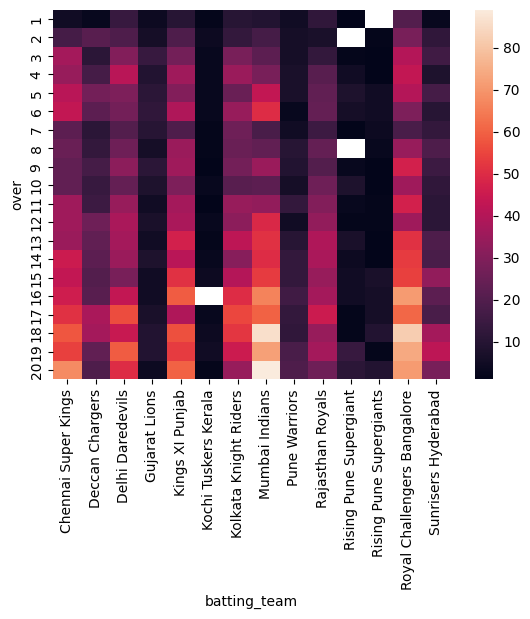

In [155]:
import seaborn as sns
# heat map expects pivot table
sns.heatmap(pvt_tbl)


Correlations calculations

In [156]:
# generates correlation matrix
matchpvt = matches.corr(numeric_only=True)
matchpvt

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.471087,0.024281,-0.010263,-0.015510
season,0.471087,1.000000,0.004170,-0.016815,-0.000708
dl_applied,0.024281,0.004170,1.000000,-0.010893,-0.011640
win_by_runs,-0.010263,-0.016815,-0.010893,1.000000,-0.565181
win_by_wickets,-0.015510,-0.000708,-0.011640,-0.565181,1.000000


<AxesSubplot: >

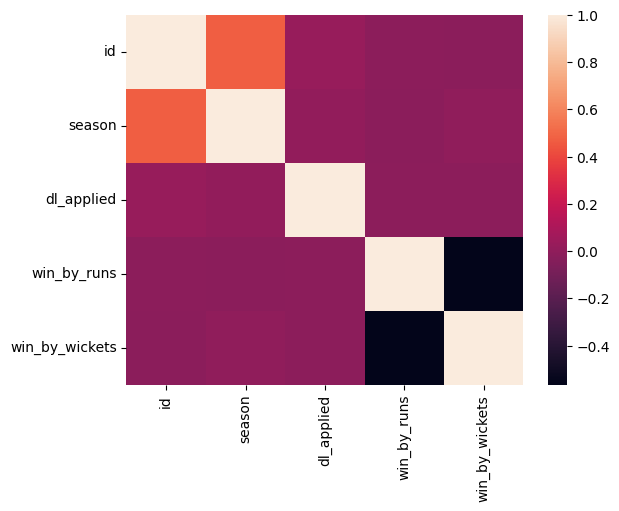

In [157]:
# generate heatmap for this correlation matrix
sns.heatmap(matchpvt)

Rename Columns of a DataFrame

In [158]:
print(matches.columns)
print(matches.rename(columns={'city':'Location', 'date': 'Date_Of_Match'}).columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')
Index(['id', 'season', 'Location', 'Date_Of_Match', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1',
       'umpire2'],
      dtype='object')


Index Functions:

set_index(): sets the given column as index of the DataFrame

reset_index(): This will change the index into column for DataFrame

Note: When reset_index is applied on a series, that will change into a dataFrame

In [159]:
matches = pd.read_csv('data/matches.csv')
print(matches.head(1))

   id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied               winner  win_by_runs  win_by_wickets  \
0  normal           0  Sunrisers Hyderabad           35               0   

  player_of_match                                      venue      umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   

    umpire2  umpire3  
0  NJ Llong      NaN  


In [160]:
matches.set_index('id', inplace=True)
matches.head(1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [161]:
matches.reset_index(inplace=True)
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


Missing data handling-

dropna(): Iterate row-wise OR column-wise to find and drop 'NA' values row/column. 
a. Criteria is 'how' b. axis=0/1

fillna():

In [162]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
print(titanic.shape)
#titanic.dropna(how='any')
titanic.dropna(how='all', axis=0)
print(titanic.shape)
# Following works only on the subset criteria
titanic.dropna(how='any', axis=0, subset=['Cabin', 'Embarked']).shape

(891, 12)
(891, 12)


(202, 12)

In [164]:
# titanic.fillna(0)  # this will fill all NA with '0'. Not appropriate for non-integer values
# changes made in the series below will be made into DataFrame also. Can validate this after printing dataframe 
titanic['Cabin'].fillna("Not-Filled", inplace=True)
titanic['Age'].fillna(method='bfill')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [165]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not-Filled,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not-Filled,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not-Filled,S
